<a href="https://colab.research.google.com/github/meetAmarAtGithub/Reva_MachineLearning/blob/main/h20_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.0 MB 39 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.2-py2.py3-none-any.whl size=177070945 sha256=4a5115fb3caeab4ad3e98fcc53be800edf3e9f8055751c7cf72073965d59ca92
  Stored in directory: /root/.cache/pip/wheels/a5/2b/ae/534595df09001e1573b1046be62a3f049507307340119db65c
Successfully built h2o


In [ ]:
import h2o

In [ ]:
from h2o.automl import H2OAutoML

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpzg1ncwnh
  JVM stdout: /tmp/tmpzg1ncwnh/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpzg1ncwnh/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_unknownUser_kvazd2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


# <font color="blue"><b>Wine quality</b> ( Regression Problem) </font>

In [ ]:
# Import wine quality dataset
#f = "https://h2o-public-test-data.s3.amazonaws.com/smalldata/wine/winequality-redwhite-no-BOM.csv"
df = h2o.import_file("https://h2o-public-test-data.s3.amazonaws.com/smalldata/wine/winequality-redwhite-no-BOM.csv")
df.head(5)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6,white
6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6,white
8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6,white
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6,white
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6,white


In [ ]:
df.describe()

Rows:6497
Cols:13




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
type,real,real,real,real,real,real,real,real,real,real,real,int,enum
mins,3.8,0.08,0.0,0.6,0.009,1.0,6.0,0.98711,2.72,0.22,8.0,3.0,
mean,7.215307064799134,0.33966599969216565,0.31863321533015243,5.443235339387409,0.056033861782361055,30.52531937817455,115.7445744189626,0.9946966338309989,3.2185008465445586,0.5312682776666153,10.49180083114946,5.818377712790516,
maxs,15.9,1.58,1.66,65.8,0.611,289.0,440.0,1.03898,4.01,2.0,14.9,9.0,
sigma,1.2964337577998144,0.16463647408467877,0.14531786489759152,4.7578037431474165,0.035033601372459054,17.749399772002505,56.52185452263029,0.0029986730037191147,0.16078720210398736,0.1488058736144902,1.1927117488689802,0.8732552715311245,
zeros,0,0,151,0,0,0,0,0,0,0,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6.0,white
1,6.3,0.3,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6.0,white
2,8.1,0.28,0.4,6.9,0.05,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,white


In [ ]:
#Response column
y = 'quality'

#split into train and test
split= df.split_frame(ratios=[0.8], seed =1)
test = split[1]
train = split[0]

In [ ]:
train.describe()

Rows:5205
Cols:13




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
type,real,real,real,real,real,real,real,real,real,real,real,int,enum
mins,3.8,0.08,0.0,0.6,0.009,1.0,6.0,0.98713,2.72,0.22,8.4,3.0,
mean,7.215187319884727,0.3382651296829973,0.3180826128722382,5.410874159462056,0.05590951008645536,30.504899135446696,115.60605187319885,0.9946732257444764,3.2188242074927955,0.5303477425552354,10.49602113352315,5.816330451488954,
maxs,15.9,1.58,1.66,31.6,0.467,289.0,440.0,1.0103,4.01,1.98,14.9,9.0,
sigma,1.304544541542817,0.16362996778355768,0.14454271001519478,4.681001853013922,0.0347818566459467,17.907284946761127,56.3882913749171,0.002950595268820003,0.16041153607220826,0.14844535804377798,1.1969678423076942,0.8761082705325356,
zeros,0,0,122,0,0,0,0,0,0,0,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6.0,white
1,6.3,0.3,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6.0,white
2,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.4,9.9,6.0,white


In [ ]:
test.describe()

Rows:1292
Cols:13




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
type,real,real,real,real,real,real,real,real,real,real,real,int,enum
mins,4.2,0.08,0.0,0.7,0.015,3.0,6.0,0.98711,2.74,0.23,8.0,3.0,
mean,7.215789473684211,0.3453095975232198,0.32085139318885453,5.573606811145511,0.056534829721362215,30.607585139318893,116.30263157894737,0.9947909365325077,3.2171981424148606,0.5349767801857586,10.474798761602166,5.826625386996903,
maxs,15.5,1.33,1.0,65.8,0.611,131.0,313.0,1.03898,4.01,2.0,14.0,9.0,
sigma,1.2637264601265137,0.16857705421433797,0.14843585064392092,5.0552083710636735,0.036039390540579835,17.105077943489597,57.07534850946479,0.0031844728731910614,0.1623478427850675,0.150250241311809,1.1757143334636333,0.8619524998941783,
zeros,0,0,29,0,0,0,0,0,0,0,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0
0,8.1,0.28,0.4,6.9,0.05,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,white
1,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6.0,white
2,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8.0,white


In [ ]:
#Run AutoML for 1 minute
aml = H2OAutoML(max_runtime_secs=60, seed=1)
aml.train(y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_1_20220611_110702

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.09949203396917944
RMSE: 0.31542357865127874
MAE: 0.23399331656800104
RMSLE: 0.04792102036258921
R^2: 0.8703548736917546
Mean Residual Deviance: 0.09949203396917944
Null degrees of freedom: 5204
Residual degrees of freedom: 5200
Null deviance: 3994.4119116234624
Residual deviance: 517.856036809579
AIC: 2771.6877092713303

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.38913098182373396
RMSE: 0.6238036404380259
MAE: 0.45956433947840686
RMSLE: 0.09437848386611421
R^2: 0.4929349287942232
Mean Residual Deviance: 0.38913098182373396
Null degrees of freedom: 5204
Residual degrees of freedom: 5200
Null deviance: 3994.9

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.459562,0.013898,0.478215,0.439280,0.462240,0.457360,0.460713
1,mean_residual_deviance,0.388873,0.029154,0.438942,0.363208,0.377847,0.378783,0.385585
2,mse,0.388873,0.029154,0.438942,0.363208,0.377847,0.378783,0.385585
3,null_deviance,798.982060,46.617355,859.110800,777.355470,779.725650,834.378850,744.339600
4,r2,0.493244,0.027849,0.449206,0.499858,0.497468,0.526431,0.493255
5,residual_deviance,405.085360,38.692440,473.179840,388.632100,391.827700,395.070680,376.716460
6,rmse,0.623259,0.022944,0.662527,0.602667,0.614693,0.615453,0.620955
7,rmsle,0.094251,0.004294,0.101705,0.090862,0.093484,0.092014,0.093190


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_1_20220611_110702,0.623804,0.389131,0.459564,0.0943785,0.389131,546,0.059369,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20220611_110702,0.624038,0.389423,0.459818,0.0944086,0.389423,459,0.038917,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20220611_110702,0.625088,0.390735,0.461803,0.0945497,0.390735,403,0.037127,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20220611_110702,0.625128,0.390784,0.462136,0.0945608,0.390784,499,0.036911,StackedEnsemble
GBM_4_AutoML_1_20220611_110702,0.639965,0.409555,0.487475,0.0966837,0.409555,819,0.016077,GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20220611_110702,0.642463,0.412759,0.483798,0.0969259,0.412759,558,0.038183,StackedEnsemble
DRF_1_AutoML_1_20220611_110702,0.649846,0.422299,0.468169,0.0985165,0.422299,662,0.013176,DRF
GBM_3_AutoML_1_20220611_110702,0.650222,0.422788,0.500556,0.0980154,0.422788,712,0.017634,GBM
GBM_2_AutoML_1_20220611_110702,0.662782,0.439279,0.515114,0.099717,0.439279,887,0.014352,GBM
GBM_1_AutoML_1_20220611_110702,0.670089,0.449019,0.517399,0.100828,0.449019,2106,0.028812,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

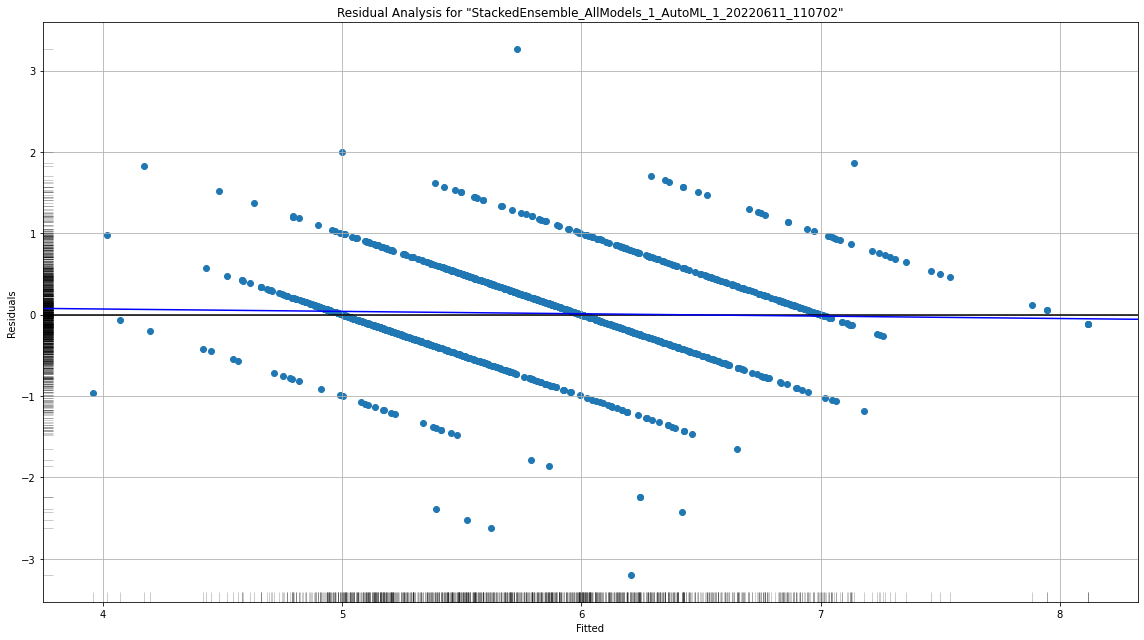

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

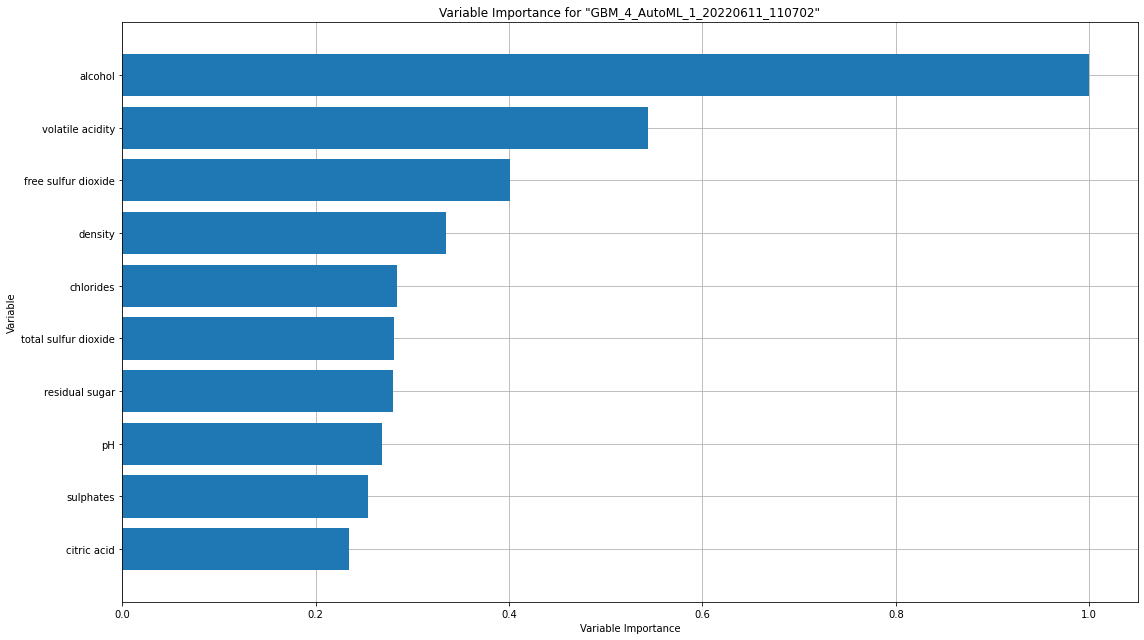

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

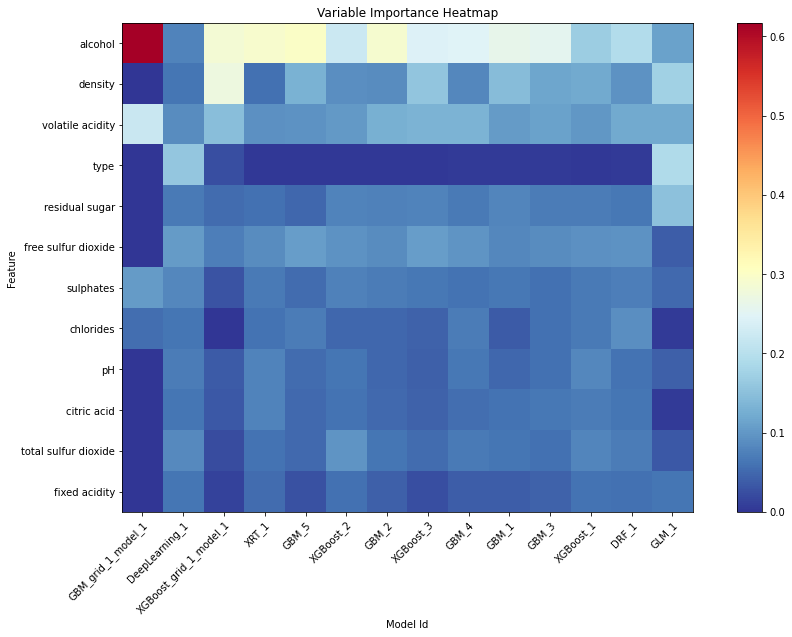

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

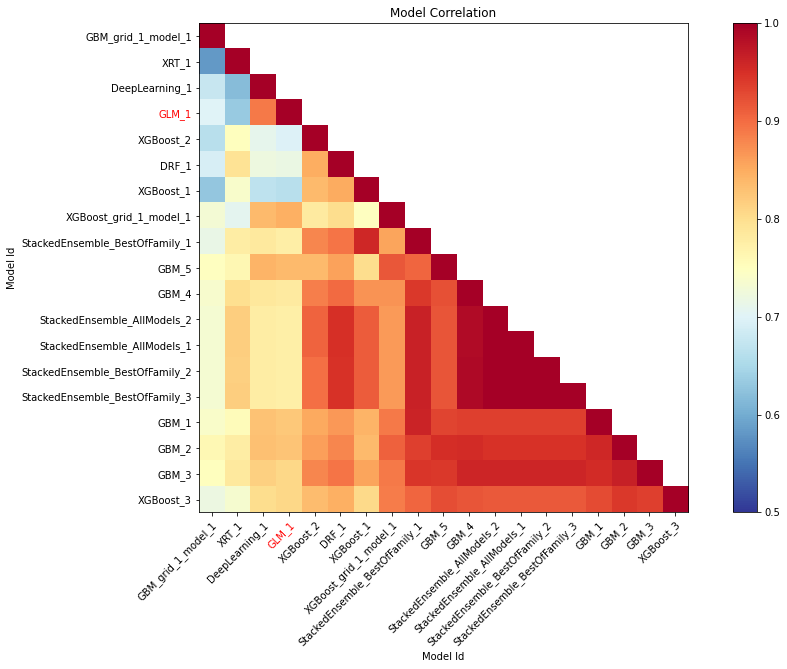

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

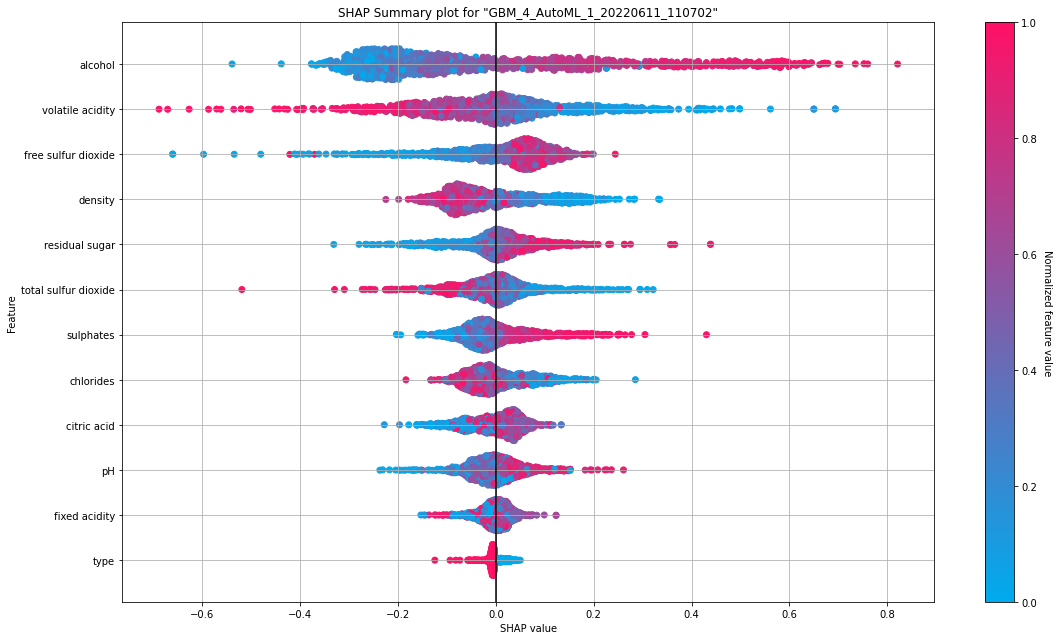

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

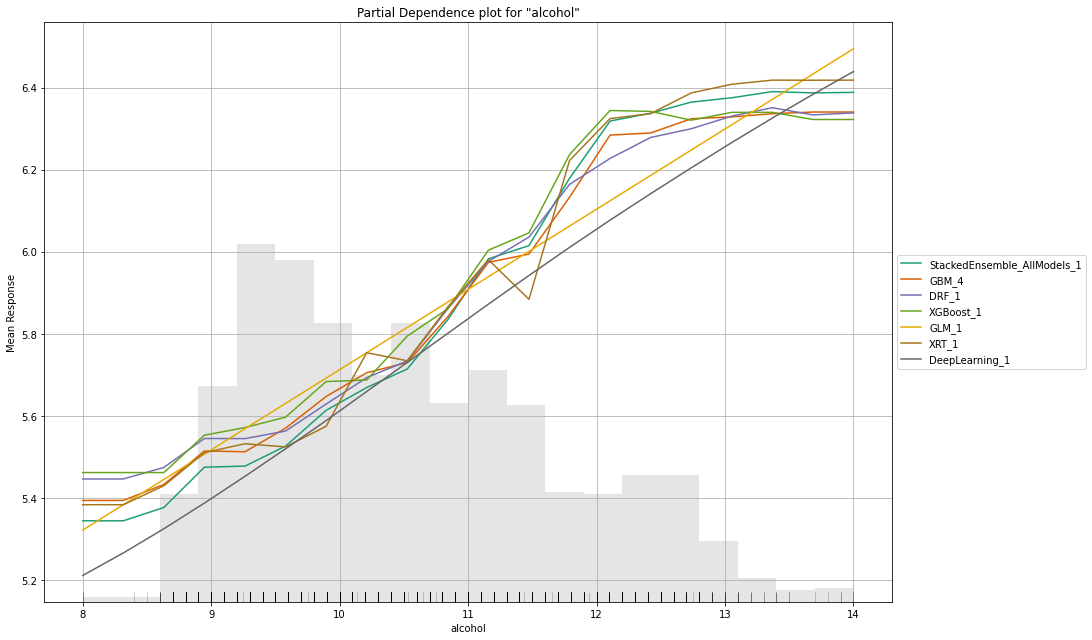

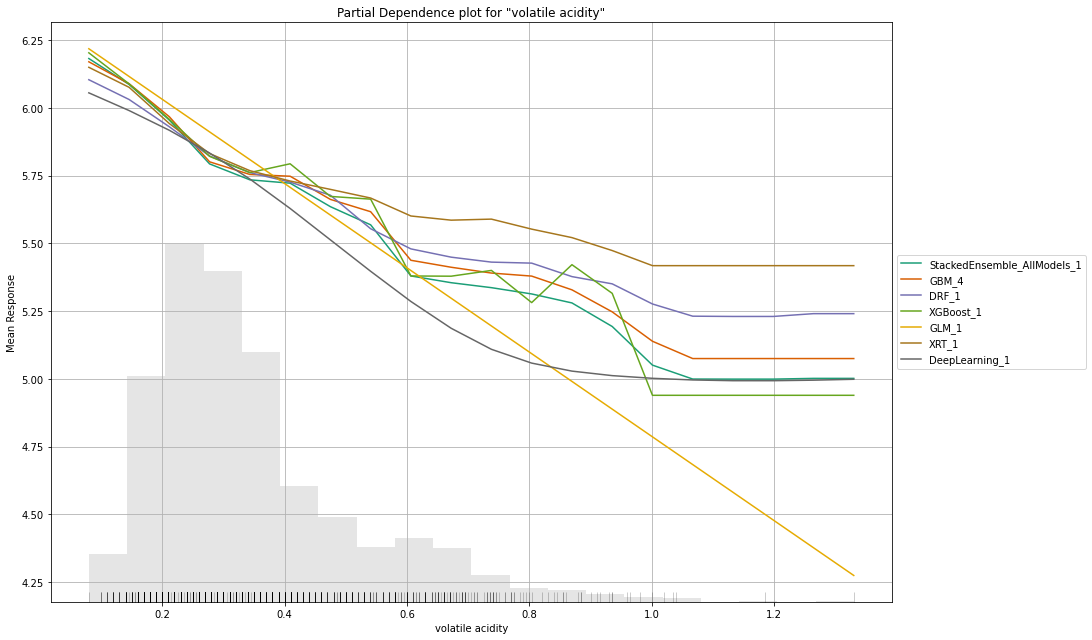

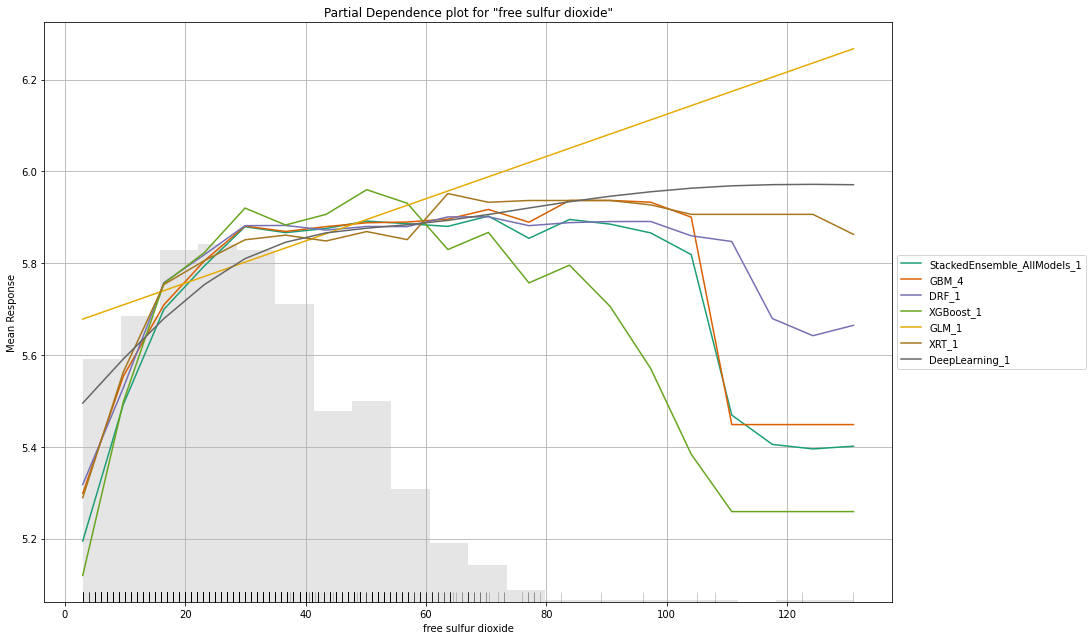

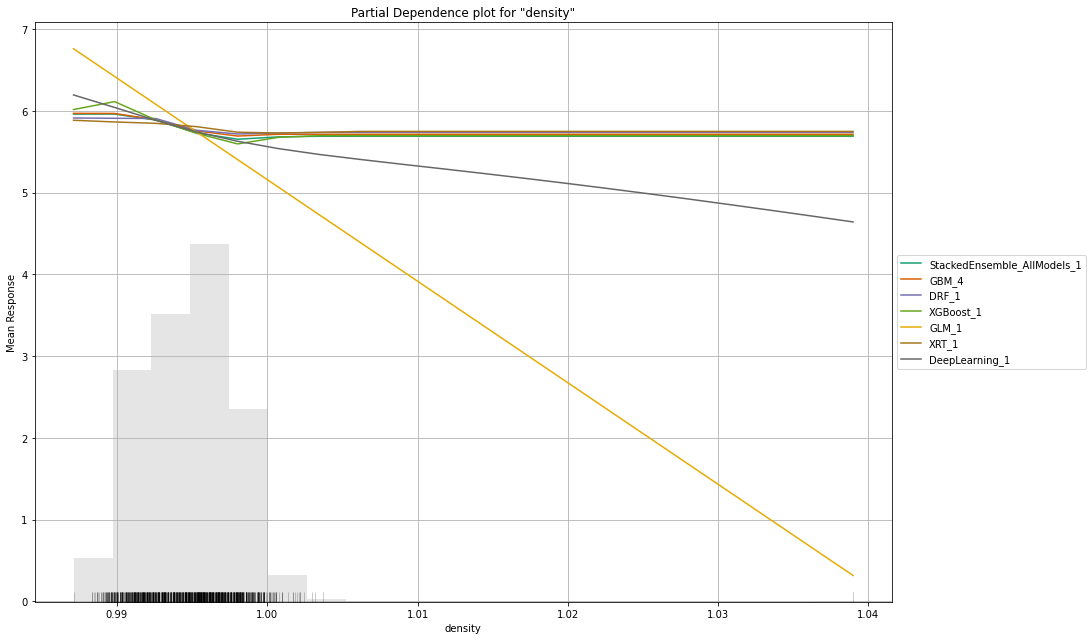

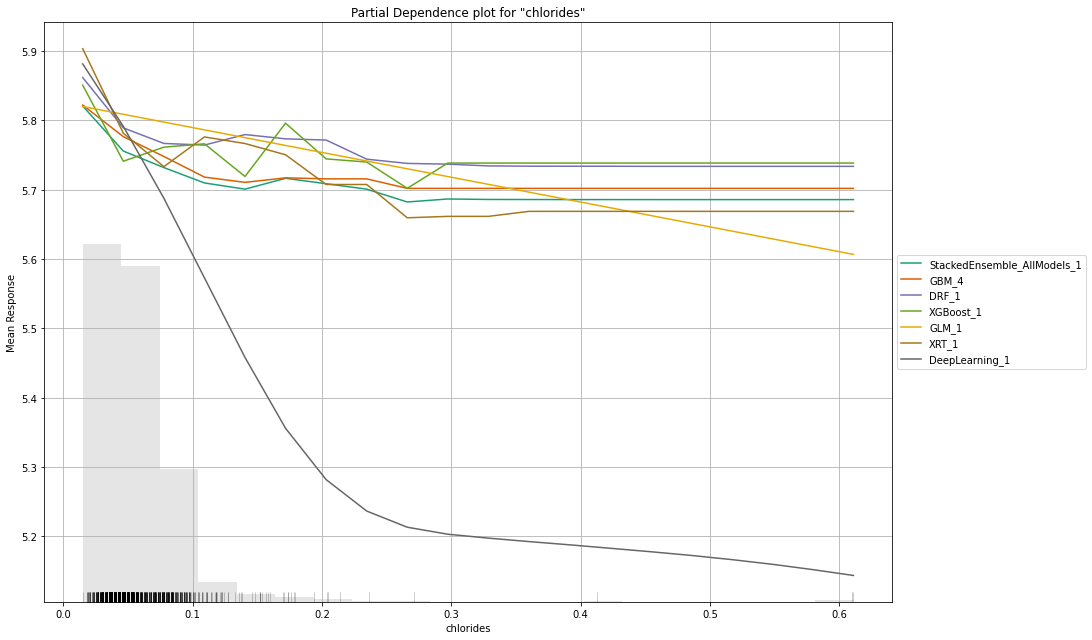

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

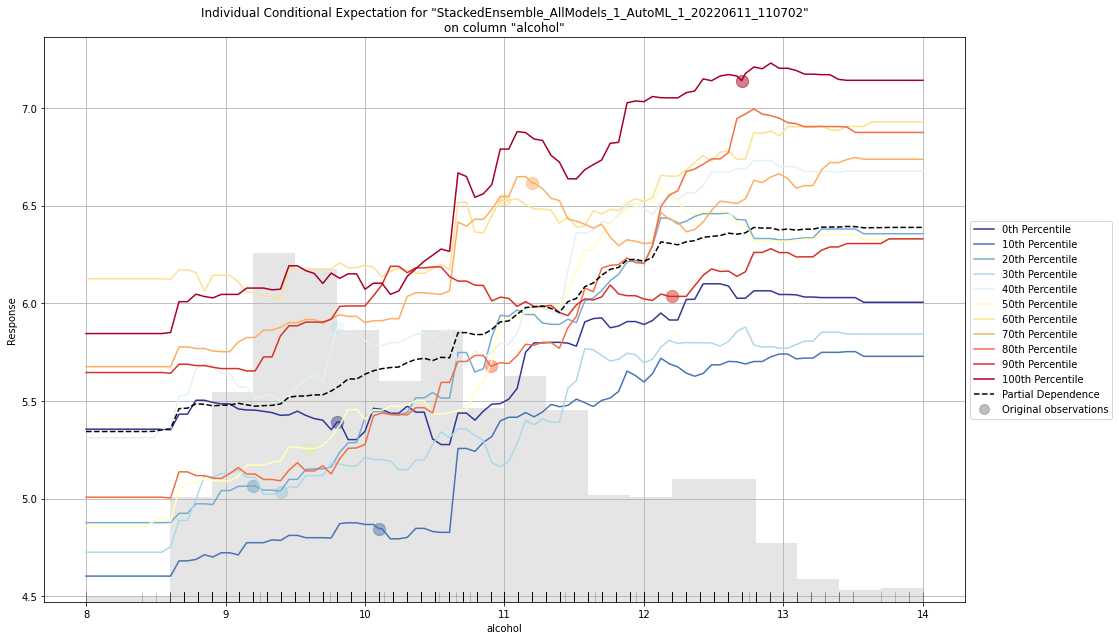

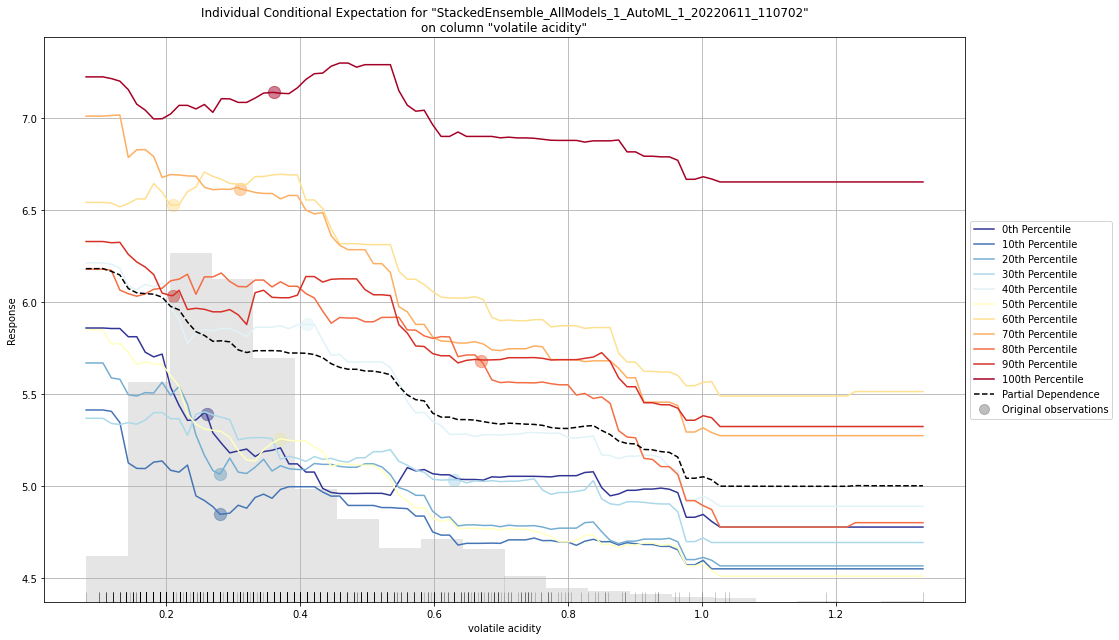

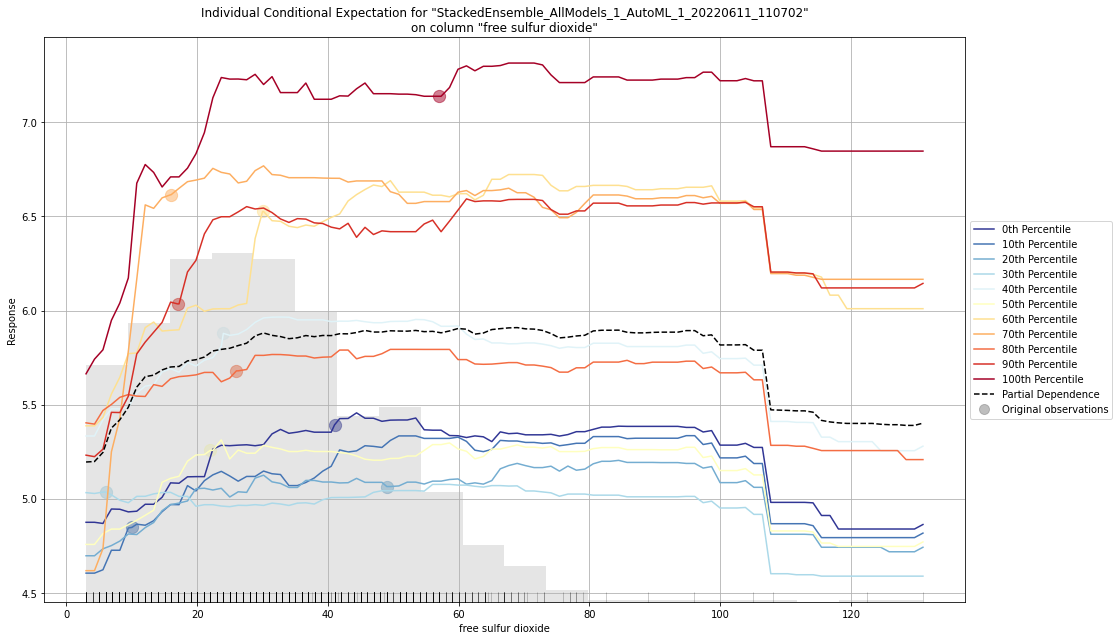

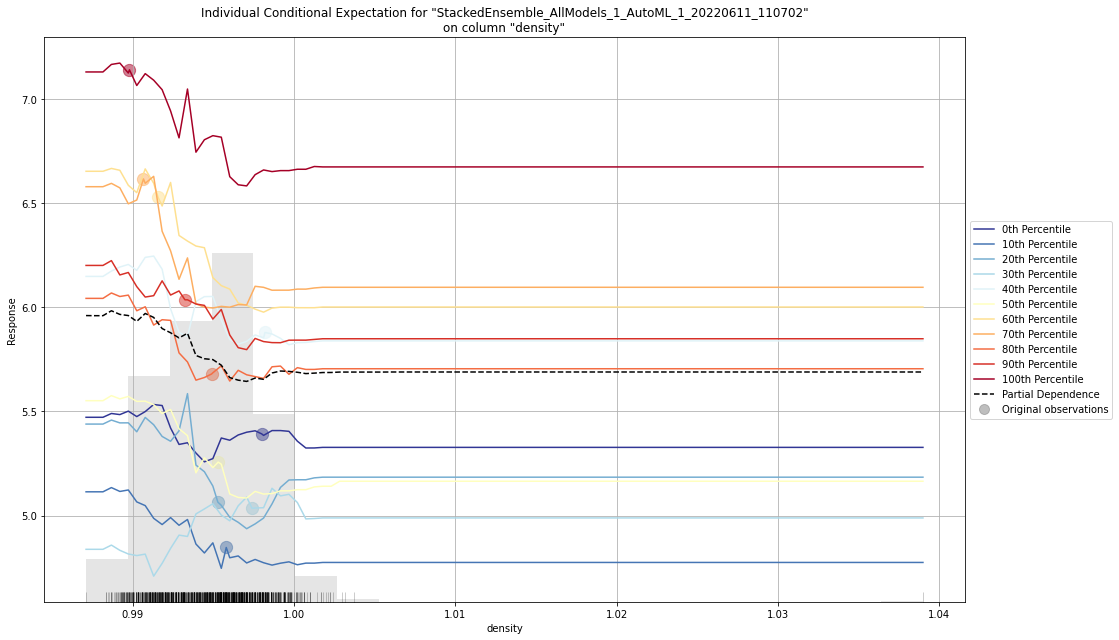

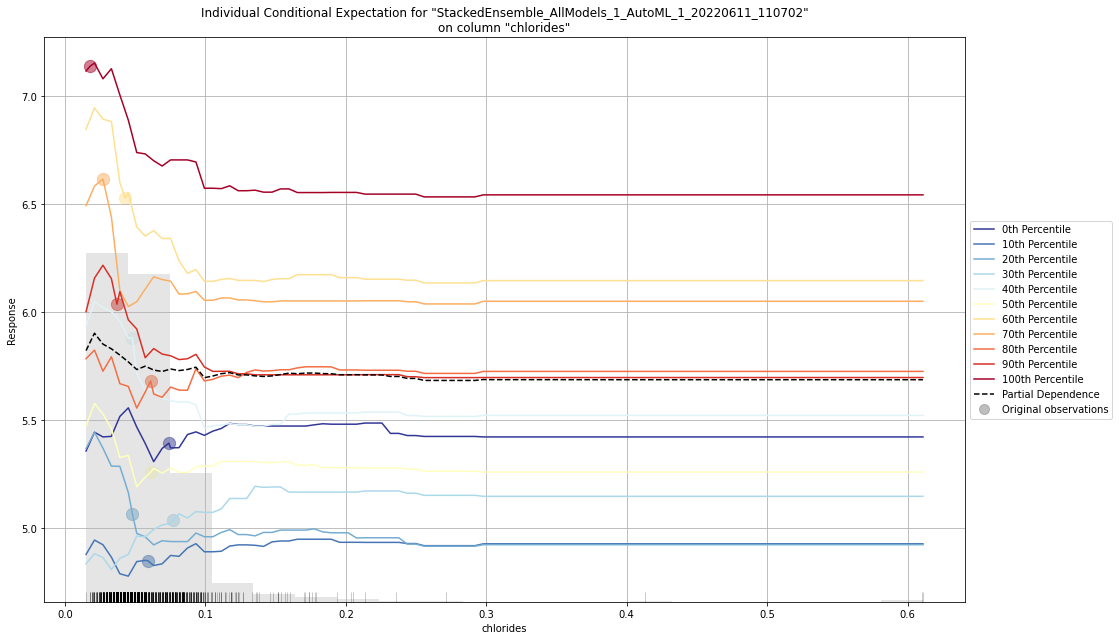

In [ ]:
#explain leader model and compare with all AutoML models
exa = aml.explain(test)

# <font color="blue"><b>Prostate cancer</b> ( classification problem)</font>

In [ ]:
# import the prostate dataset
prostate = h2o.import_file("https://h2o-public-test-data.s3.amazonaws.com/smalldata/prostate/prostate.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
